## 1. Import the libraries and prepare dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('wine.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Standardize dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 2. Apply PCA to reduce dimensions

In [3]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
x_kpca_train = kpca.fit_transform(x_train)
x_kpca_test = kpca.transform(x_test)

In [5]:
print('Eigenvalues:\n', kpca.lambdas_, '\n')
print('Eigenvectors:\n', kpca.alphas_, '\n')

Eigenvalues:
 [19.12612219 12.61567209] 

Eigenvectors:
 [[ 0.10641906 -0.06597836]
 [ 0.06547603  0.08580932]
 [-0.02763905  0.1201148 ]
 [ 0.13069927 -0.10506236]
 [-0.09841284  0.02198794]
 [-0.1016596  -0.06924738]
 [-0.02614026  0.14223068]
 [ 0.01623414  0.1365923 ]
 [ 0.01199551  0.14516684]
 [-0.10149764 -0.0568923 ]
 [ 0.1167226  -0.04601867]
 [-0.05574017  0.06047109]
 [ 0.08945101 -0.06226652]
 [-0.10303918 -0.10117528]
 [ 0.10000172 -0.03369898]
 [ 0.12474796 -0.0527034 ]
 [-0.11439583 -0.05865452]
 [ 0.02481876 -0.0478356 ]
 [-0.12720063 -0.02674798]
 [-0.00123561  0.15010956]
 [ 0.09945498 -0.104825  ]
 [ 0.11453335 -0.05001022]
 [-0.03829743  0.03670386]
 [ 0.12105681 -0.04418631]
 [ 0.11685519 -0.10241893]
 [-0.07959563  0.00145771]
 [ 0.10267011 -0.00853149]
 [ 0.08182321  0.00812141]
 [-0.03141887  0.14081886]
 [ 0.07380025  0.03132597]
 [ 0.12566264 -0.05970653]
 [-0.00759361  0.0757378 ]
 [-0.11051278 -0.06340851]
 [ 0.01205103  0.02595639]
 [-0.01127965 -0.01392148

## 3. Training the Logistic Regression model on the Training set

In [6]:
from sklearn.linear_model import LogisticRegression

model_kpca = LogisticRegression(random_state=0)
model_kpca.fit(x_kpca_train, y_train)

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

## 4a. Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

def predict(y_pred, subtitle):
    cm = confusion_matrix(y_test, y_pred)
    print(f'Accuracy score ({subtitle}) : ', accuracy_score(y_test, y_pred))
    print(pd.DataFrame(cm), '\n')

predict(model_kpca.predict(x_kpca_test), 'w PCA')
predict(model.predict(x_test), 'w/o PCA')

Accuracy score (w PCA) :  1.0
    0   1  2
0  14   0  0
1   0  16  0
2   0   0  6 

Accuracy score (w/o PCA) :  1.0
    0   1  2
0  14   0  0
1   0  16  0
2   0   0  6 



## 5b. Visualising the results (PCA)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


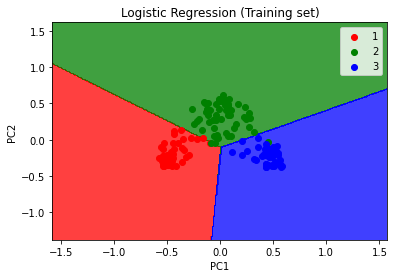

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


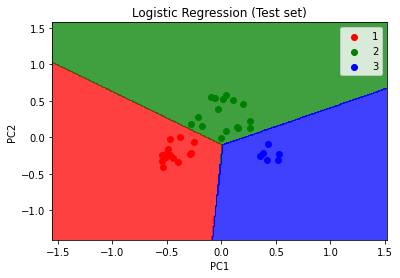

In [8]:
from matplotlib.colors import ListedColormap

def display_graph(x_set, y_set, set_type):
    x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

    plt.contourf(x1, x2, model_kpca.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

    plt.title(f'Logistic Regression ({set_type})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
display_graph(x_kpca_train, y_train, 'Training set')
display_graph(x_kpca_test, y_test, 'Test set')
